In [1]:
# import necessary modules
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm            # cm stands for colormaps
from sklearn.metrics.pairwise import pairwise_distances

# TDA related modules
import tadasets                      # tadasets: has useful datasets for TDA (or TaDA)
import ripser                        # to compute Persistance Diagrams (PDs)
import persim                        # to plot PDs
from ripser import Rips

In [2]:
# generate dataset
np.random.seed(2141)

datadim = 1
num_samples = 100
circle_data = tadasets.dsphere(d = datadim,          # sample from d-dim sphere
                              n = num_samples,       # sample n points
                              noise = 0.0)           # StdDev of normal noise added to data 

circle_noisy = tadasets.dsphere(d = datadim,          # sample from d-dim sphere
                              n = num_samples,        # sample n points
                              noise = 0.10)           # StdDev of normal noise added to data 

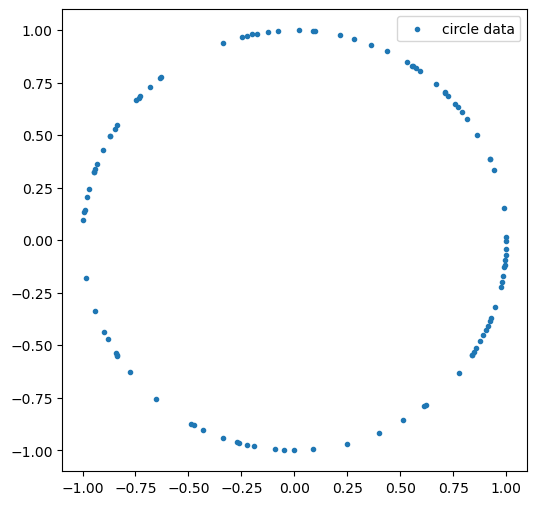

In [3]:
plt.rcParams["figure.figsize"] = (6,6)                                                   # adjusts size of output plot
plt.scatter(x = circle_data[:,0], y = circle_data[:,1], label = "circle data", s = 9)    # s controls size of dot
plt.legend()
plt.show()

In [12]:
epsilon_vals = np.linspace(0,6, 6)
n = len(epsilon_vals)
h = 1                                   # max homology dimension of interest

In [13]:
# initialize an empty dictionary
PD_dict = {}

for i in range(n):
    key_i = " ".join([f"barcode{i}"])
    PD_dict[key_i] =  ripser.ripser(X = circle_data, maxdim=h,thresh= epsilon_vals[i], coeff = 2, distance_matrix = False)


In [14]:
PD_dict.keys()

dict_keys(['barcode0', 'barcode1', 'barcode2', 'barcode3', 'barcode4', 'barcode5'])

/home/padmaraga/anaconda3/envs/tsvd_fmri/lib/python3.12/site-packages/persim/visuals.py:155: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([x_down, x_up])
/home/padmaraga/anaconda3/envs/tsvd_fmri/lib/python3.12/site-packages/persim/visuals.py:156: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([y_down, y_up])


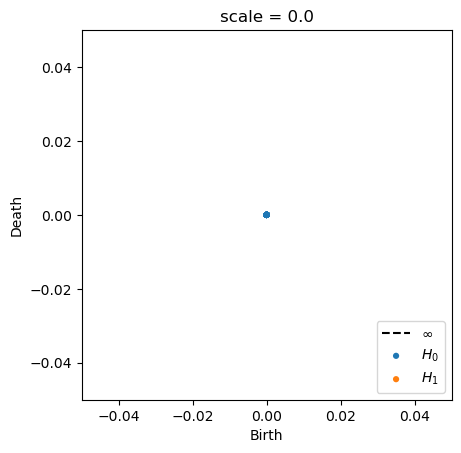

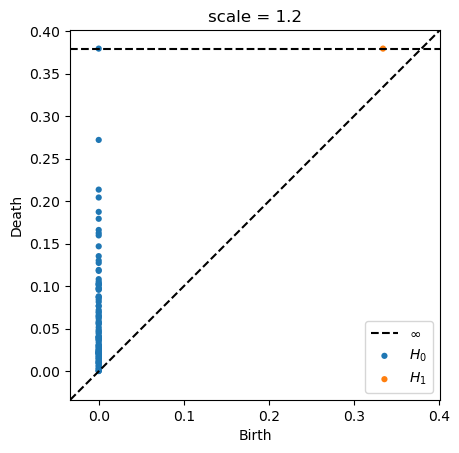

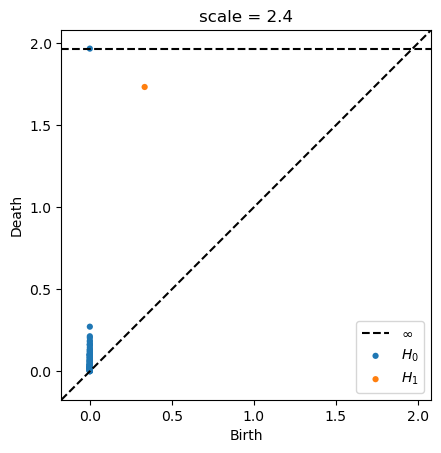

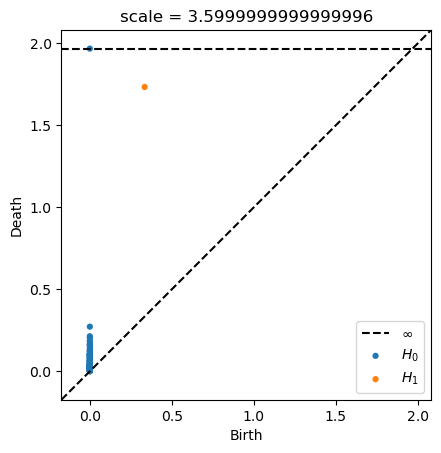

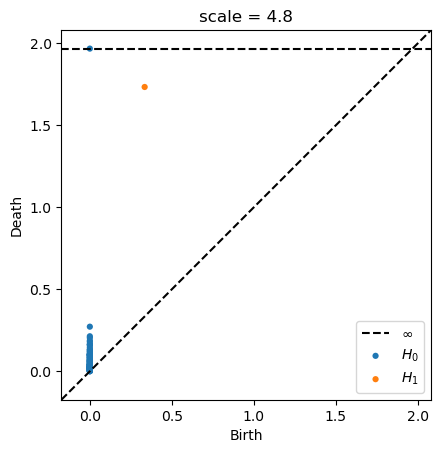

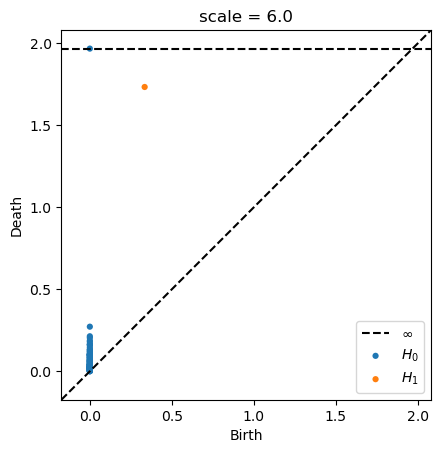

<Figure size 640x480 with 0 Axes>

In [16]:
for i in range(n):
    key_i = " ".join([f"barcode{i}"])
    dgm_obj = PD_dict[key_i] 
    dgm = dgm_obj['dgms']
    persim.plot_diagrams(dgm, show = True, title = f"scale = {epsilon_vals[i]}") 

plt.tight_layout()